# Step 3 : Dimensionality Reduction & Feature Selection

## 3.1 PCA

Number of components explaining 90% variance: 26


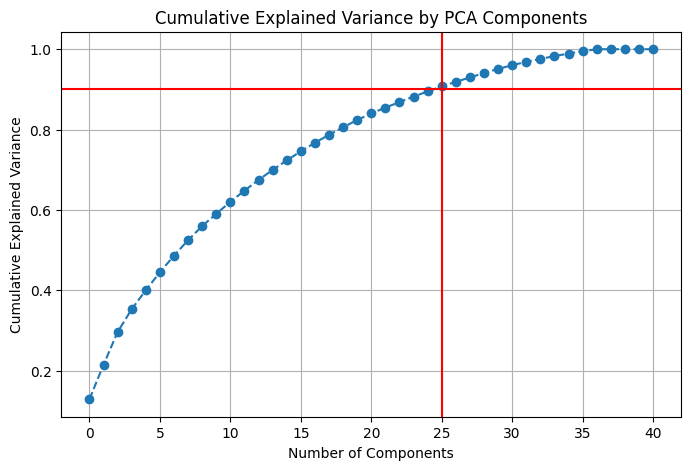

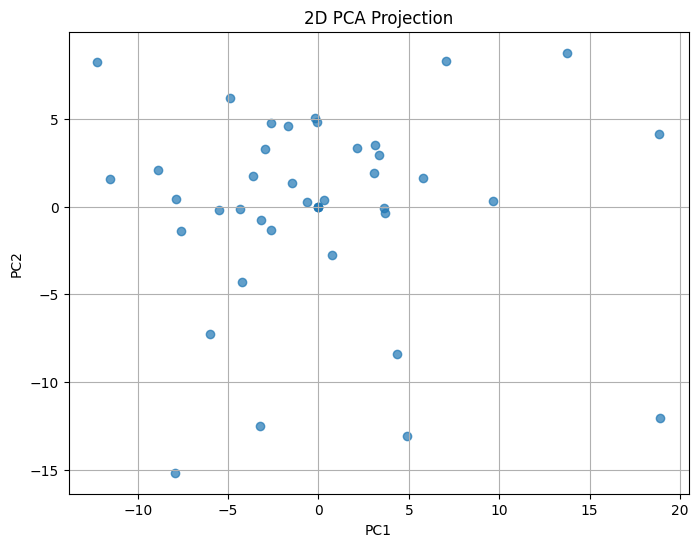

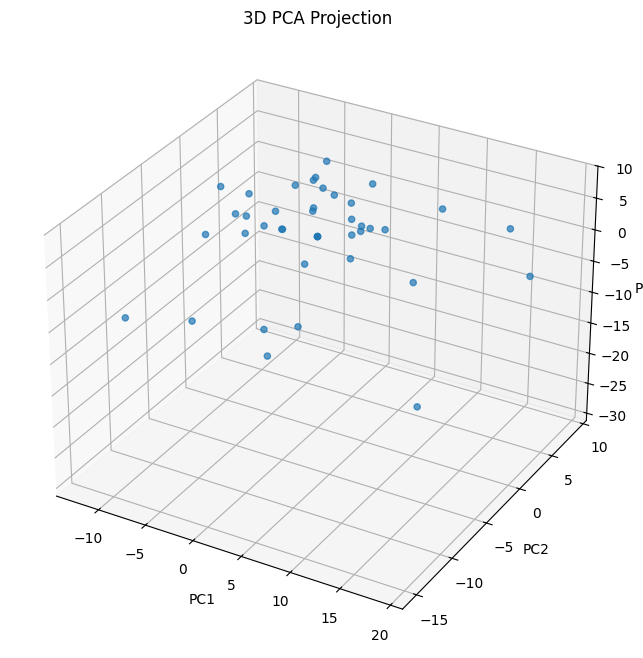

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Load the preprocessed features (X)
X = pd.read_csv('features_preprocessed.csv')

# Standardize features (mean=0, std=1) - optional if already scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components that explain >90% variance
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
print(f'Number of components explaining 90% variance: {n_components_90}')

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cum_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=n_components_90-1, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Visualize data in 2D and 3D using the top components
# 2D plot with first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.grid(True)
plt.show()

# 3D plot with first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection')
plt.show()


In [ ]:
import os

# Ensure 'models' directory exists
os.makedirs('models', exist_ok=True)

import joblib
# After PCA (fit and transform)
joblib.dump(pca, 'models/pca_components.pkl')


['models/pca_components.pkl']

## 3.2 LDA

Accuracy on test set: 0.875
Confusion Matrix:
[[0 1]
 [0 7]]
Top LDA features contributing to class separation:
TIVA_Lip Suck_min           0.109368
EEG_Gamma_TP9_min          -0.095989
GSR_GSR RAW_std             0.086057
EEG_Accelerometer_X_mean    0.081542
EEG_Accelerometer_Z_mean    0.076533
GSR_Timestamp RAW_mean      0.073278
GSR_Timestamp RAW_std      -0.072897
IVT_Gaze X_mean             0.072397
EEG_Gyro_Z_mean            -0.071909
TIVA_Sadness_max           -0.071826
dtype: float64


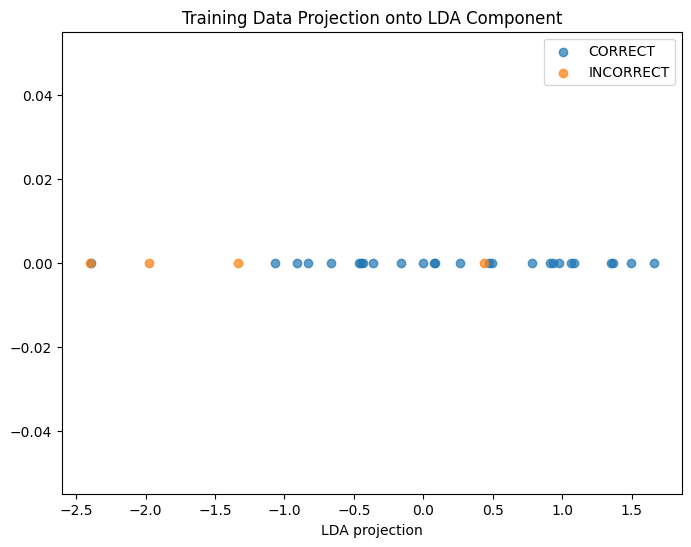

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

# Load preprocessed features and targets
X = pd.read_csv('features_preprocessed.csv')
y = pd.read_csv('targets.csv')

# Select a binary classification target variable, e.g., 'TARGET_verdict' with classes 'CORRECT' and 'INCORRECT'
# Encode target labels if necessary (e.g., map 'CORRECT' -> 1 and 'INCORRECT' -> 0)
y_label = y['TARGET_verdict'].map({'CORRECT': 1, 'INCORRECT': 0})

# If needed, drop samples with missing target labels
X = X[~y_label.isna()]
y_label = y_label.dropna()

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train/test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Create and train LDA model
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform test data
X_test_lda = lda.transform(X_test)

# Evaluate using simple logistic regression for classification on LDA output
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_lda, y_train)
y_pred = logreg.predict(X_test_lda)

# Performance metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy on test set: {acc}")
print("Confusion Matrix:")
print(cm)

# Get LDA coefficients (which features contribute most)
coefficients = lda.coef_[0]
feature_names = X.columns
important_features = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)
print("Top LDA features contributing to class separation:")
print(important_features.head(10))

# Optional: plot projection of samples on LDA axis colored by class
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[y_train==1], np.zeros_like(X_train_lda[y_train==1]), label='CORRECT', alpha=0.7)
plt.scatter(X_train_lda[y_train==0], np.zeros_like(X_train_lda[y_train==0]), label='INCORRECT', alpha=0.7)
plt.legend()
plt.xlabel('LDA projection')
plt.title('Training Data Projection onto LDA Component')
plt.show()


In [ ]:
import os
import joblib

# Ensure 'models' directory exists before saving
os.makedirs('models', exist_ok=True)

# After you have fit your LDA model, e.g.
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# lda.fit(X, y)

joblib.dump(lda, 'models/lda_model.pkl')


['models/lda_model.pkl']

## 3.3 Autoencoders

Epoch 1/100
1/1 - 4s - 4s/step - loss: 0.1226 - val_loss: 0.1091
Epoch 2/100
1/1 - 0s - 67ms/step - loss: 0.1219 - val_loss: 0.1083
Epoch 3/100
1/1 - 0s - 64ms/step - loss: 0.1210 - val_loss: 0.1072
Epoch 4/100
1/1 - 0s - 60ms/step - loss: 0.1199 - val_loss: 0.1058
Epoch 5/100
1/1 - 0s - 58ms/step - loss: 0.1185 - val_loss: 0.1040
Epoch 6/100
1/1 - 0s - 66ms/step - loss: 0.1168 - val_loss: 0.1019
Epoch 7/100
1/1 - 0s - 105ms/step - loss: 0.1148 - val_loss: 0.0996
Epoch 8/100
1/1 - 0s - 64ms/step - loss: 0.1125 - val_loss: 0.0969
Epoch 9/100
1/1 - 0s - 59ms/step - loss: 0.1098 - val_loss: 0.0940
Epoch 10/100
1/1 - 0s - 65ms/step - loss: 0.1070 - val_loss: 0.0908
Epoch 11/100
1/1 - 0s - 63ms/step - loss: 0.1039 - val_loss: 0.0876
Epoch 12/100
1/1 - 0s - 60ms/step - loss: 0.1007 - val_loss: 0.0843
Epoch 13/100
1/1 - 0s - 60ms/step - loss: 0.0975 - val_loss: 0.0810
Epoch 14/100
1/1 - 0s - 60ms/step - loss: 0.0944 - val_loss: 0.0779
Epoch 15/100
1/1 - 0s - 64ms/step - loss: 0.0914 - val_los

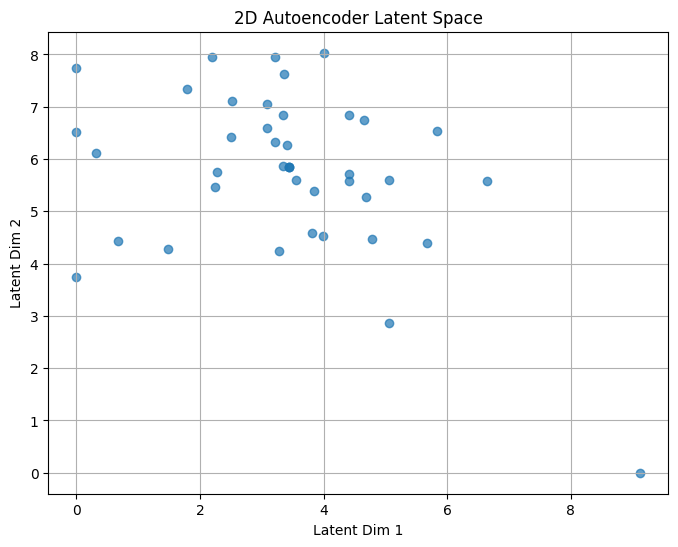

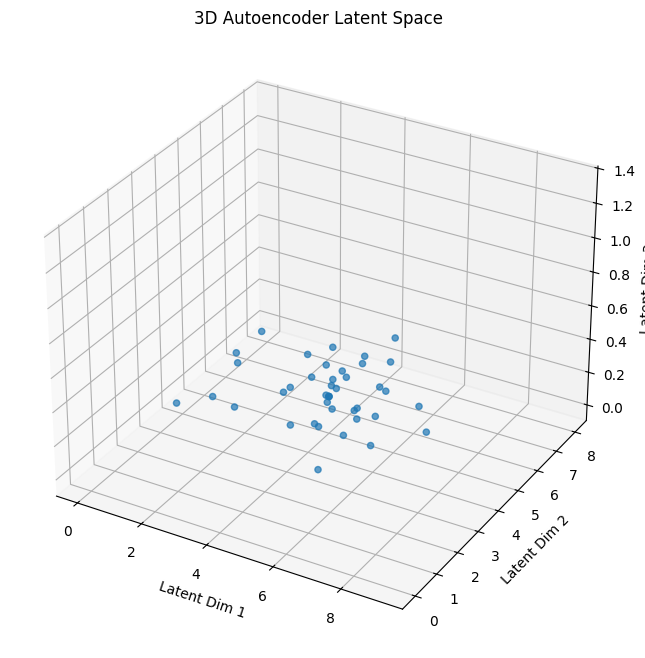

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import joblib

# Load preprocessed features
X = pd.read_csv('features_preprocessed.csv')

# Normalize the data (0 to 1)
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm = X_norm.fillna(0)  # fill any NaNs after normalization

# Convert to numpy array
X_data = X_norm.values.astype('float32')

# Define autoencoder architecture
input_dim = X_data.shape[1]
encoding_dim = 10  # dimension of the bottleneck

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # bottleneck layer

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model for extracting latent space
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
history = autoencoder.fit(X_data, X_data,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=2)

# Extract latent space representation
X_latent = encoder.predict(X_data)

# Visualize latent space in 2D or 3D if encoding_dim >= 2 or 3
if encoding_dim >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_latent[:, 0], X_latent[:, 1], alpha=0.7)
    plt.xlabel('Latent Dim 1')
    plt.ylabel('Latent Dim 2')
    plt.title('2D Autoencoder Latent Space')
    plt.grid(True)
    plt.show()

if encoding_dim >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_latent[:, 0], X_latent[:, 1], X_latent[:, 2], alpha=0.7)
    ax.set_xlabel('Latent Dim 1')
    ax.set_ylabel('Latent Dim 2')
    ax.set_zlabel('Latent Dim 3')
    ax.set_title('3D Autoencoder Latent Space')
    plt.show()


In [ ]:
import os
import torch

# Ensure 'models' directory exists
os.makedirs('models', exist_ok=True)

# Assuming autoencoder is your trained PyTorch model instance
# Save only the model weights (recommended)
torch.save(autoencoder, 'models/autoencoder_model.pt')

# Later load as:
# autoencoder = torch.load('models/autoencoder_model.pt')
# autoencoder.eval()


## 3.4  Feature Importance

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=27fe50375d424032191a1aaeb61d5632555dfd4fe623ef396e27e936c738941b
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

LIME Explanation for test instance 0:
TIVA_Lip Stretch_std > 0.61: -0.0152
EYE_ET_PupilLeft_max > 0.44: -0.0146
EYE_ET_PupilRight_max > 0.32: -0.0123
IVT_Saccade Start_mean <= -0.72: -0.0098
EEG_Gamma_TP10_std > 0.45: -0.0097
EEG_Gamma_TP9_mean <= -0.70: 0.0083
GSR_Timestamp RAW_mean > 0.67: 0.0069
0.11 < EEG_Beta_TP10_min <= 0.45: 0.0068
EEG_Gamma_TP9_min <= -0.63: 0.0063
-0.03 < EEG_Gyro_Y_min <= 0.21: 0.0053


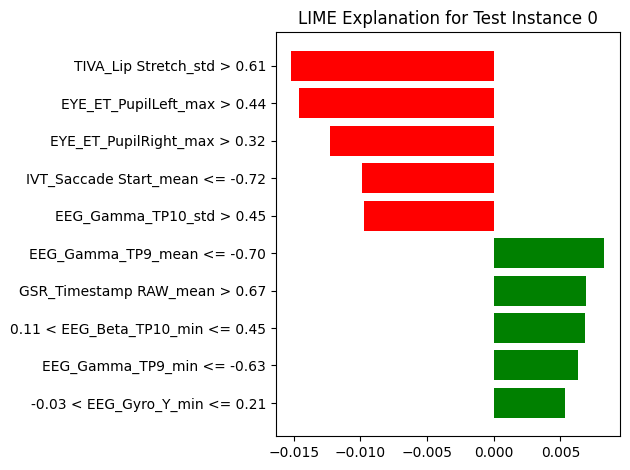

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load preprocessed features and targets
X = pd.read_csv('features_preprocessed.csv')
y = pd.read_csv('targets.csv')

# Map target labels to binary numerical values
y_label = y['TARGET_verdict'].map({'INCORRECT': 0, 'CORRECT': 1})

# Drop missing target rows
mask = y_label.notna()
X = X.loc[mask]
y_label = y_label.loc[mask]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Set up LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['INCORRECT', 'CORRECT'],
    mode='classification',
    discretize_continuous=True
)

# Pick an instance to explain (first test sample)
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=rf.predict_proba,
    num_features=10
)

# Show explanation as list of (feature, weight)
print(f"LIME Explanation for test instance {i}:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

# Plot explanation
fig = exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Test Instance {i}')
plt.tight_layout()
plt.show()


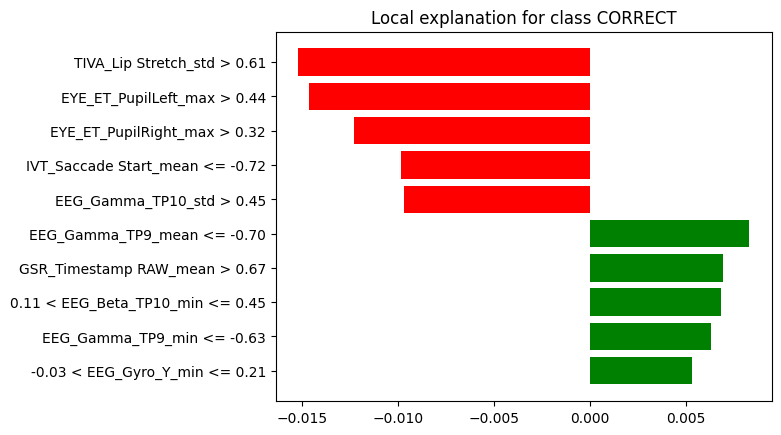

In [ ]:
import pandas as pd
import os

# Assuming 'exp' is your LIME explanation object for the test instance

# Create 'models' directory if it does not exist
os.makedirs('models', exist_ok=True)

# Save the explanation as CSV (feature and weight)
lime_exp_list = exp.as_list()
pd.DataFrame(lime_exp_list, columns=['Feature', 'Weight']).to_csv('models/lime_explanation_instance_0.csv', index=False)

# Save explanation plot as PNG
fig = exp.as_pyplot_figure()
fig.savefig('models/lime_explanation_instance_0.png')

# After saving, you can also display the plot inline
import matplotlib.pyplot as plt
plt.show()



# Step 4 : Evaluation & Interpretation

## 4.1  Metrics

PCA Variance Explained:
Cumulative variance explaining top components: [0.12874805 0.21476236 0.29616441 0.35291472 0.40012081 0.44490042
 0.48612011 0.52474109 0.55974609 0.59042675 0.61998519 0.64807711
 0.67460172 0.69955956 0.72320777 0.74582157 0.76707213 0.78706773
 0.8057488  0.82370104 0.8402508  0.85451701 0.86852572 0.88212835
 0.89482536 0.90744064]
Total variance explained by top 26 components: 0.9074


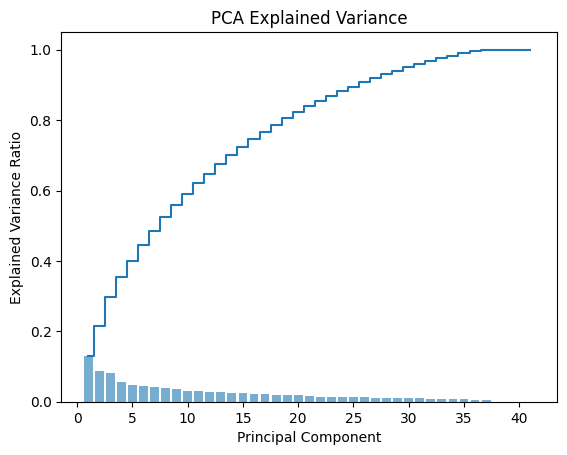

LDA Classifier Accuracy on Test Set: 0.8750
LDA Confusion Matrix:
[[0 1]
 [0 7]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Autoencoder Reconstruction Mean Squared Error: 0.042584
Top selected features from Random Forest:
['EEG_Gamma_TP10_std', 'TIVA_Sentimentality_std', 'IVT_Gaze X_mean', 'TIVA_Jaw Drop_std', 'TIVA_Nose Wrinkle_mean', 'TIVA_Lip Stretch_std', 'TIVA_Jaw Drop_mean', 'IVT_Saccade Start_mean', 'IVT_Fixation X_min', 'EYE_ET_PupilLeft_max']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score

# STEP 4.1: EVALUATION & INTERPRETATION

# 1. PCA: Variance explained by selected principal components
print("PCA Variance Explained:")
print(f"Cumulative variance explaining top components: {cum_variance[:n_components_90]}")
print(f"Total variance explained by top {n_components_90} components: {cum_variance[n_components_90-1]:.4f}")

plt.figure()
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.6)
plt.step(range(1, len(cum_variance) + 1), cum_variance, where='mid')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

# 2. LDA: Classification accuracy using reduced feature space
lda_accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Classifier Accuracy on Test Set: {lda_accuracy:.4f}")
print("LDA Confusion Matrix:")
print(cm)

# 3. Autoencoder: Reconstruction error (mean squared error)
X_reconstructed = autoencoder.predict(X_data)  # From Autoencoder step
mse = mean_squared_error(X_data, X_reconstructed)
print(f"Autoencoder Reconstruction Mean Squared Error: {mse:.6f}")

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 4. Feature importance: Select most informative features
top_features = importance_df.head(10)['Feature'].tolist()
print("Top selected features from Random Forest:")
print(top_features)


## 4.2 Interpretation

Total variance explained by top components: 1.0000


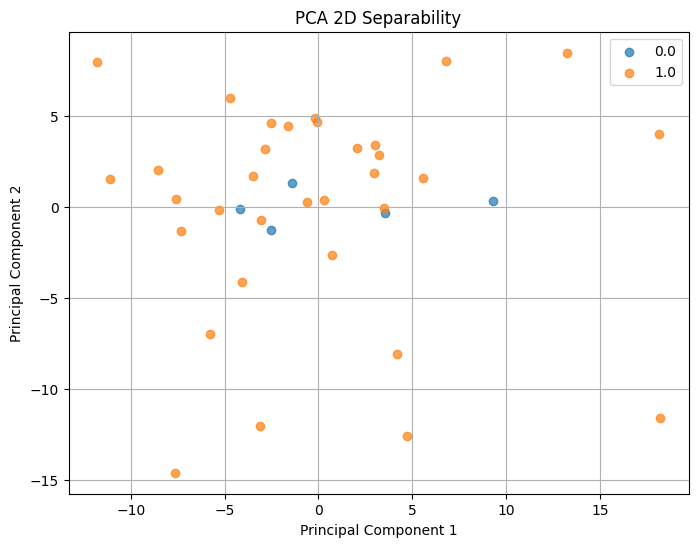

Modality Contribution in Top Features:
EEG: 5
Facial: 7
Eye Tracking: 4
Other: 1
GSR: 3

Cognitive Mapping of Key Features:
GSR_Timestamp RAW_std: Physiological Arousal over Time
TIVA_Jaw Drop_std: Surprise or Distraction
EEG_Accelerometer_Z_mean: Body Movement
TIVA_Nose Wrinkle_mean: Disgust or Concentration
TIVA_Sentimentality_std: Not Mapped
IVT_Fixation X_min: Visual Focus
EEG_Accelerometer_X_mean: Body Movement
IVT_Gaze X_mean: Visual Attention
TIVA_Lip Stretch_std: Not Mapped
GSR_Timestamp RAW_mean: Physiological Arousal over Time
EYE_ET_PupilLeft_max: Pupil Dilation - Emotional/Arousal State
TIVA_Lip Suck_min: Stress/Anxiety Indicator
EEG_Gamma_TP9_min: High Cognitive Processing
TIVA_Jaw Drop_mean: Surprise or Distraction
IVT_Saccade Start_mean: Not Mapped
EEG_Gamma_TP10_std: High Cognitive Processing
EEG_Gyro_Z_mean: Head Movement/Orientation
GSR_GSR RAW_std: Physiological Arousal
TIVA_Sadness_max: Emotional State - Sadness


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load original preprocessed features and targets again
X = pd.read_csv('features_preprocessed.csv')
y = pd.read_csv('targets.csv')

# Map target labels to numerical (binary)
y_label = y['TARGET_verdict'].map({'INCORRECT': 0, 'CORRECT': 1})

# Step 1: Filter out samples with missing label, apply mask to X and y_label
mask = y_label.notna()
X_filtered = X.loc[mask].reset_index(drop=True)
y_filtered = y_label.loc[mask].reset_index(drop=True)

# Step 2: Recompute PCA on filtered data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Print cumulative variance explained for interpretation
cum_variance = np.cumsum(pca.explained_variance_ratio_)

print(f"Total variance explained by top components: {cum_variance[-1]:.4f}")

# Step 4: Plot PCA 2D separability with aligned labels
def plot_separability(X_proj, y_labels, title='Separability Plot'):
    plt.figure(figsize=(8, 6))
    classes = np.unique(y_labels)
    for cls in classes:
        idx = y_labels == cls
        plt.scatter(X_proj[idx, 0], X_proj[idx, 1], label=str(cls), alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_separability(X_pca[:, :2], y_filtered, title='PCA 2D Separability')

# Step 5: Modality Contributions and Cognitive Mapping (example) from combined top features (RF + LDA)

# Use your RF and LDA top features; here assumed to be defined already
# Example lists (replace with your actual top feature lists)
rf_top_features = importance_df.head(10)['Feature'].tolist()
lda_top_features = list(important_features.head(10).index)
all_top_features = rf_top_features + lda_top_features

def get_modality(feature_name):
    if feature_name.startswith(('EEG', 'Brain')):
        return 'EEG'
    elif feature_name.startswith(('Eye', 'IVT', 'Fixation', 'Gaze')):
        return 'Eye Tracking'
    elif feature_name.startswith(('GSR', 'Skin', 'Galvanic')):
        return 'GSR'
    elif feature_name.startswith(('TIVA', 'Facial', 'Face', 'Expression')):
        return 'Facial'
    else:
        return 'Other'

modalities = [get_modality(f) for f in all_top_features]
from collections import Counter
modalities_count = Counter(modalities)

print("Modality Contribution in Top Features:")
for modality, count in modalities_count.items():
    print(f"{modality}: {count}")

# Cognitive mapping example (adjust feature names to your dataset)
cognitive_map = {
    'EEG_Beta': 'Focused Attention',
    'EEG_Alpha': 'Relaxation',
    'EEG_Gamma': 'High Cognitive Processing',
    'EEG_Delta': 'Deep Sleep or Unconsciousness',
    'EEG_Theta': 'Drowsiness or Early Sleep',
    'EEG_Gyro': 'Head Movement/Orientation',
    'EEG_Accelerometer': 'Body Movement',
    'IVT_Gaze X_mean': 'Visual Attention',
    'IVT_Fixation': 'Visual Focus',
    'TIVA_Lip Suck_min': 'Stress/Anxiety Indicator',
    'TIVA_Jaw Drop': 'Surprise or Distraction',
    'TIVA_Nose Wrinkle': 'Disgust or Concentration',
    'TIVA_Sadness': 'Emotional State - Sadness',
    'GSR_GSR RAW': 'Physiological Arousal',
    'GSR_Timestamp RAW': 'Physiological Arousal over Time',
    'EYE_ET_PupilLeft': 'Pupil Dilation - Emotional/Arousal State',
    'EYE_ET_PupilRight': 'Pupil Dilation - Emotional/Arousal State',
    # Add others as needed
}


print("\nCognitive Mapping of Key Features:")
for feature in set(all_top_features):
    mapped = False
    for key, meaning in cognitive_map.items():
        if key in feature:
            print(f"{feature}: {meaning}")
            mapped = True
            break
    if not mapped:
        print(f"{feature}: Not Mapped")
